source: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [1]:
!pip install torchsummary

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
from fastai.vision import AdaptiveConcatPool2d
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [3]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!mkdir data
!tar zxvf cifar10.tgz -C data/

--2019-10-01 17:28:52--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz’

cifar10.tgz         100%[===================>] 128.85M  16.1MB/s    in 9.3s    

2019-10-01 17:29:02 (13.9 MB/s) - ‘cifar10.tgz’ saved [135107811/135107811]

cifar10/
cifar10/train/
cifar10/train/bird/
cifar10/train/bird/2429.png
cifar10/train/bird/1420.png
cifar10/train/bird/1039.png
cifar10/train/bird/2217.png
cifar10/train/bird/2929.png
cifar10/train/bird/0529.png
cifar10/train/bird/3975.png
cifar10/train/bird/1295.png
cifar10/train/bird/2795.png
cifar10/train/bird/4010.png
cifar10/train/bird/2178.png
cifar10/train/bird/4164.png
cifar10/train/bird/0696.png
cifar10/train/bird/0043.png
cifar10/train/bird/4692.png
cifar10/train/bird/3514.png
cifa

cifar10/train/bird/4666.png
cifar10/train/bird/1797.png
cifar10/train/bird/1636.png
cifar10/train/bird/0760.png
cifar10/train/bird/2776.png
cifar10/train/bird/0883.png
cifar10/train/bird/3565.png
cifar10/train/bird/3305.png
cifar10/train/bird/0505.png
cifar10/train/bird/3683.png
cifar10/train/bird/1400.png
cifar10/train/bird/1179.png
cifar10/train/bird/2695.png
cifar10/train/bird/4212.png
cifar10/train/bird/4993.png
cifar10/train/bird/3744.png
cifar10/train/bird/2106.png
cifar10/train/bird/2433.png
cifar10/train/bird/3214.png
cifar10/train/bird/2684.png
cifar10/train/bird/2871.png
cifar10/train/bird/0812.png
cifar10/train/bird/0837.png
cifar10/train/bird/2263.png
cifar10/train/bird/3119.png
cifar10/train/bird/4927.png
cifar10/train/bird/1537.png
cifar10/train/bird/2315.png
cifar10/train/bird/1689.png
cifar10/train/bird/4562.png
cifar10/train/bird/4806.png
cifar10/train/bird/2964.png
cifar10/train/bird/3097.png
cifar10/train/bird/2967.png
cifar10/train/bird/1182.png
cifar10/train/bird/3

cifar10/train/bird/2045.png
cifar10/train/bird/1007.png
cifar10/train/bird/2317.png
cifar10/train/bird/1825.png
cifar10/train/bird/0151.png
cifar10/train/bird/3436.png
cifar10/train/bird/3073.png
cifar10/train/bird/4245.png
cifar10/train/bird/0746.png
cifar10/train/bird/4548.png
cifar10/train/bird/1353.png
cifar10/train/bird/3654.png
cifar10/train/bird/1562.png
cifar10/train/bird/4160.png
cifar10/train/bird/2279.png
cifar10/train/bird/4234.png
cifar10/train/bird/4192.png
cifar10/train/bird/1477.png
cifar10/train/bird/1429.png
cifar10/train/bird/1389.png
cifar10/train/bird/1541.png
cifar10/train/bird/3460.png
cifar10/train/bird/0075.png
cifar10/train/bird/3602.png
cifar10/train/bird/2184.png
cifar10/train/bird/3132.png
cifar10/train/bird/4586.png
cifar10/train/bird/3243.png
cifar10/train/bird/1119.png
cifar10/train/bird/1897.png
cifar10/train/bird/2242.png
cifar10/train/bird/0256.png
cifar10/train/bird/4182.png
cifar10/train/bird/1772.png
cifar10/train/bird/2062.png
cifar10/train/bird/4

cifar10/train/bird/0120.png
cifar10/train/bird/0277.png
cifar10/train/bird/3410.png
cifar10/train/bird/4960.png
cifar10/train/bird/2018.png
cifar10/train/bird/4630.png
cifar10/train/bird/3665.png
cifar10/train/bird/3448.png
cifar10/train/bird/4382.png
cifar10/train/bird/4750.png
cifar10/train/bird/1531.png
cifar10/train/bird/0127.png
cifar10/train/bird/1016.png
cifar10/train/bird/3196.png
cifar10/train/bird/2852.png
cifar10/train/bird/3916.png
cifar10/train/bird/4015.png
cifar10/train/bird/0345.png
cifar10/train/bird/1088.png
cifar10/train/bird/0842.png
cifar10/train/bird/2249.png
cifar10/train/bird/1796.png
cifar10/train/bird/2329.png
cifar10/train/bird/3590.png
cifar10/train/bird/2591.png
cifar10/train/bird/3404.png
cifar10/train/bird/4151.png
cifar10/train/bird/1764.png
cifar10/train/bird/3098.png
cifar10/train/bird/0719.png
cifar10/train/bird/1037.png
cifar10/train/bird/2854.png
cifar10/train/bird/4185.png
cifar10/train/bird/4309.png
cifar10/train/bird/0705.png
cifar10/train/bird/1

cifar10/train/bird/4410.png
cifar10/train/bird/0258.png
cifar10/train/bird/3698.png
cifar10/train/bird/1612.png
cifar10/train/bird/1460.png
cifar10/train/bird/4807.png
cifar10/train/bird/2781.png
cifar10/train/bird/3804.png
cifar10/train/bird/1214.png
cifar10/train/bird/3068.png
cifar10/train/bird/3584.png
cifar10/train/bird/3231.png
cifar10/train/bird/2623.png
cifar10/train/bird/0995.png
cifar10/train/bird/0199.png
cifar10/train/bird/1207.png
cifar10/train/bird/3276.png
cifar10/train/bird/3428.png
cifar10/train/bird/0632.png
cifar10/train/bird/2504.png
cifar10/train/bird/0813.png
cifar10/train/bird/3567.png
cifar10/train/bird/0053.png
cifar10/train/bird/2371.png
cifar10/train/bird/4475.png
cifar10/train/bird/1600.png
cifar10/train/bird/3340.png
cifar10/train/bird/2558.png
cifar10/train/bird/1327.png
cifar10/train/bird/2722.png
cifar10/train/bird/4649.png
cifar10/train/bird/3138.png
cifar10/train/bird/0174.png
cifar10/train/bird/1209.png
cifar10/train/bird/3701.png
cifar10/train/bird/3

cifar10/train/bird/1925.png
cifar10/train/bird/2601.png
cifar10/train/bird/4372.png
cifar10/train/bird/0493.png
cifar10/train/bird/0432.png
cifar10/train/bird/2679.png
cifar10/train/bird/4030.png
cifar10/train/bird/1464.png
cifar10/train/bird/2125.png
cifar10/train/bird/0262.png
cifar10/train/bird/2624.png
cifar10/train/bird/3554.png
cifar10/train/bird/4013.png
cifar10/train/bird/3579.png
cifar10/train/bird/2808.png
cifar10/train/bird/2463.png
cifar10/train/bird/2549.png
cifar10/train/bird/0852.png
cifar10/train/bird/4508.png
cifar10/train/bird/4685.png
cifar10/train/bird/2655.png
cifar10/train/bird/2304.png
cifar10/train/bird/1232.png
cifar10/train/bird/0636.png
cifar10/train/bird/1392.png
cifar10/train/bird/2201.png
cifar10/train/bird/0975.png
cifar10/train/bird/4790.png
cifar10/train/bird/0709.png
cifar10/train/bird/4743.png
cifar10/train/bird/1089.png
cifar10/train/bird/1243.png
cifar10/train/bird/0913.png
cifar10/train/bird/0693.png
cifar10/train/bird/1467.png
cifar10/train/bird/0

cifar10/train/horse/2130.png
cifar10/train/horse/0263.png
cifar10/train/horse/3771.png
cifar10/train/horse/3372.png
cifar10/train/horse/3478.png
cifar10/train/horse/1860.png
cifar10/train/horse/3211.png
cifar10/train/horse/0914.png
cifar10/train/horse/4791.png
cifar10/train/horse/1514.png
cifar10/train/horse/2535.png
cifar10/train/horse/2232.png
cifar10/train/horse/4166.png
cifar10/train/horse/4648.png
cifar10/train/horse/3905.png
cifar10/train/horse/1217.png
cifar10/train/horse/3357.png
cifar10/train/horse/2109.png
cifar10/train/horse/0417.png
cifar10/train/horse/4347.png
cifar10/train/horse/1565.png
cifar10/train/horse/3473.png
cifar10/train/horse/2104.png
cifar10/train/horse/2172.png
cifar10/train/horse/0850.png
cifar10/train/horse/0854.png
cifar10/train/horse/4298.png
cifar10/train/horse/3721.png
cifar10/train/horse/2080.png
cifar10/train/horse/3046.png
cifar10/train/horse/1678.png
cifar10/train/horse/4355.png
cifar10/train/horse/0514.png
cifar10/train/horse/0495.png
cifar10/train/

cifar10/train/horse/2075.png
cifar10/train/horse/2306.png
cifar10/train/horse/3208.png
cifar10/train/horse/0057.png
cifar10/train/horse/4165.png
cifar10/train/horse/4289.png
cifar10/train/horse/2882.png
cifar10/train/horse/0018.png
cifar10/train/horse/1500.png
cifar10/train/horse/2482.png
cifar10/train/horse/3803.png
cifar10/train/horse/1153.png
cifar10/train/horse/4725.png
cifar10/train/horse/0929.png
cifar10/train/horse/3422.png
cifar10/train/horse/2662.png
cifar10/train/horse/1682.png
cifar10/train/horse/1309.png
cifar10/train/horse/2746.png
cifar10/train/horse/2966.png
cifar10/train/horse/4255.png
cifar10/train/horse/0283.png
cifar10/train/horse/0586.png
cifar10/train/horse/0902.png
cifar10/train/horse/1591.png
cifar10/train/horse/1147.png
cifar10/train/horse/1391.png
cifar10/train/horse/3457.png
cifar10/train/horse/0343.png
cifar10/train/horse/1481.png
cifar10/train/horse/3868.png
cifar10/train/horse/0952.png
cifar10/train/horse/1942.png
cifar10/train/horse/2479.png
cifar10/train/

cifar10/train/horse/3009.png
cifar10/train/horse/2754.png
cifar10/train/horse/4477.png
cifar10/train/horse/2578.png
cifar10/train/horse/4267.png
cifar10/train/horse/4913.png
cifar10/train/horse/4132.png
cifar10/train/horse/0644.png
cifar10/train/horse/0177.png
cifar10/train/horse/0522.png
cifar10/train/horse/2204.png
cifar10/train/horse/0496.png
cifar10/train/horse/1503.png
cifar10/train/horse/1723.png
cifar10/train/horse/0124.png
cifar10/train/horse/2680.png
cifar10/train/horse/2338.png
cifar10/train/horse/4123.png
cifar10/train/horse/2711.png
cifar10/train/horse/0955.png
cifar10/train/horse/1071.png
cifar10/train/horse/3507.png
cifar10/train/horse/1466.png
cifar10/train/horse/2603.png
cifar10/train/horse/3019.png
cifar10/train/horse/3580.png
cifar10/train/horse/1574.png
cifar10/train/horse/2245.png
cifar10/train/horse/2094.png
cifar10/train/horse/1802.png
cifar10/train/horse/2989.png
cifar10/train/horse/1412.png
cifar10/train/horse/2389.png
cifar10/train/horse/4916.png
cifar10/train/

cifar10/train/horse/3241.png
cifar10/train/horse/3443.png
cifar10/train/horse/1079.png
cifar10/train/horse/1280.png
cifar10/train/horse/4416.png
cifar10/train/horse/3501.png
cifar10/train/horse/1315.png
cifar10/train/horse/3685.png
cifar10/train/horse/4777.png
cifar10/train/horse/1180.png
cifar10/train/horse/2996.png
cifar10/train/horse/0233.png
cifar10/train/horse/4690.png
cifar10/train/horse/1484.png
cifar10/train/horse/1020.png
cifar10/train/horse/0595.png
cifar10/train/horse/4867.png
cifar10/train/horse/4068.png
cifar10/train/horse/4122.png
cifar10/train/horse/3255.png
cifar10/train/horse/2038.png
cifar10/train/horse/1641.png
cifar10/train/horse/1721.png
cifar10/train/horse/4405.png
cifar10/train/horse/3161.png
cifar10/train/horse/1777.png
cifar10/train/horse/4618.png
cifar10/train/horse/2061.png
cifar10/train/horse/4723.png
cifar10/train/horse/3285.png
cifar10/train/horse/2150.png
cifar10/train/horse/1886.png
cifar10/train/horse/1480.png
cifar10/train/horse/4866.png
cifar10/train/

cifar10/train/horse/0244.png
cifar10/train/horse/1898.png
cifar10/train/horse/4639.png
cifar10/train/horse/3273.png
cifar10/train/horse/4545.png
cifar10/train/horse/0370.png
cifar10/train/horse/1804.png
cifar10/train/horse/3751.png
cifar10/train/horse/0350.png
cifar10/train/horse/1405.png
cifar10/train/horse/0238.png
cifar10/train/horse/2816.png
cifar10/train/horse/3395.png
cifar10/train/horse/4533.png
cifar10/train/horse/1880.png
cifar10/train/horse/2912.png
cifar10/train/horse/2004.png
cifar10/train/horse/1991.png
cifar10/train/horse/1489.png
cifar10/train/horse/0579.png
cifar10/train/horse/3532.png
cifar10/train/horse/2972.png
cifar10/train/horse/2455.png
cifar10/train/horse/1062.png
cifar10/train/horse/1599.png
cifar10/train/horse/2197.png
cifar10/train/horse/4028.png
cifar10/train/horse/3447.png
cifar10/train/horse/2405.png
cifar10/train/horse/0119.png
cifar10/train/horse/3162.png
cifar10/train/horse/2898.png
cifar10/train/horse/2666.png
cifar10/train/horse/2341.png
cifar10/train/

cifar10/train/dog/1289.png
cifar10/train/dog/2398.png
cifar10/train/dog/3703.png
cifar10/train/dog/0142.png
cifar10/train/dog/4465.png
cifar10/train/dog/4947.png
cifar10/train/dog/4691.png
cifar10/train/dog/2151.png
cifar10/train/dog/3641.png
cifar10/train/dog/0807.png
cifar10/train/dog/1965.png
cifar10/train/dog/2375.png
cifar10/train/dog/3700.png
cifar10/train/dog/1929.png
cifar10/train/dog/1817.png
cifar10/train/dog/2187.png
cifar10/train/dog/3413.png
cifar10/train/dog/0134.png
cifar10/train/dog/1023.png
cifar10/train/dog/1877.png
cifar10/train/dog/3711.png
cifar10/train/dog/0351.png
cifar10/train/dog/3939.png
cifar10/train/dog/4613.png
cifar10/train/dog/4024.png
cifar10/train/dog/4008.png
cifar10/train/dog/1754.png
cifar10/train/dog/3878.png
cifar10/train/dog/4109.png
cifar10/train/dog/1184.png
cifar10/train/dog/0186.png
cifar10/train/dog/4172.png
cifar10/train/dog/4788.png
cifar10/train/dog/2908.png
cifar10/train/dog/1974.png
cifar10/train/dog/2186.png
cifar10/train/dog/4437.png
c

cifar10/train/dog/0651.png
cifar10/train/dog/3037.png
cifar10/train/dog/3563.png
cifar10/train/dog/0188.png
cifar10/train/dog/4559.png
cifar10/train/dog/3562.png
cifar10/train/dog/1550.png
cifar10/train/dog/2406.png
cifar10/train/dog/2572.png
cifar10/train/dog/0406.png
cifar10/train/dog/0775.png
cifar10/train/dog/3592.png
cifar10/train/dog/2700.png
cifar10/train/dog/2797.png
cifar10/train/dog/4952.png
cifar10/train/dog/2731.png
cifar10/train/dog/4306.png
cifar10/train/dog/0021.png
cifar10/train/dog/1512.png
cifar10/train/dog/2647.png
cifar10/train/dog/4324.png
cifar10/train/dog/3629.png
cifar10/train/dog/1837.png
cifar10/train/dog/0136.png
cifar10/train/dog/3533.png
cifar10/train/dog/2673.png
cifar10/train/dog/0486.png
cifar10/train/dog/3712.png
cifar10/train/dog/4917.png
cifar10/train/dog/1910.png
cifar10/train/dog/4200.png
cifar10/train/dog/1434.png
cifar10/train/dog/0562.png
cifar10/train/dog/1200.png
cifar10/train/dog/4604.png
cifar10/train/dog/1172.png
cifar10/train/dog/0466.png
c

cifar10/train/dog/0771.png
cifar10/train/dog/4955.png
cifar10/train/dog/3379.png
cifar10/train/dog/3737.png
cifar10/train/dog/0596.png
cifar10/train/dog/1542.png
cifar10/train/dog/1819.png
cifar10/train/dog/4291.png
cifar10/train/dog/1961.png
cifar10/train/dog/2213.png
cifar10/train/dog/1060.png
cifar10/train/dog/0153.png
cifar10/train/dog/3472.png
cifar10/train/dog/2250.png
cifar10/train/dog/4175.png
cifar10/train/dog/1229.png
cifar10/train/dog/4537.png
cifar10/train/dog/2274.png
cifar10/train/dog/1051.png
cifar10/train/dog/0758.png
cifar10/train/dog/0399.png
cifar10/train/dog/4535.png
cifar10/train/dog/1849.png
cifar10/train/dog/3976.png
cifar10/train/dog/2811.png
cifar10/train/dog/0637.png
cifar10/train/dog/3948.png
cifar10/train/dog/0118.png
cifar10/train/dog/1576.png
cifar10/train/dog/4839.png
cifar10/train/dog/4244.png
cifar10/train/dog/3617.png
cifar10/train/dog/4975.png
cifar10/train/dog/1726.png
cifar10/train/dog/1127.png
cifar10/train/dog/4971.png
cifar10/train/dog/3054.png
c

cifar10/train/dog/0294.png
cifar10/train/dog/1111.png
cifar10/train/dog/3087.png
cifar10/train/dog/2428.png
cifar10/train/dog/4438.png
cifar10/train/dog/2947.png
cifar10/train/dog/4895.png
cifar10/train/dog/4884.png
cifar10/train/dog/2838.png
cifar10/train/dog/2046.png
cifar10/train/dog/1680.png
cifar10/train/dog/1775.png
cifar10/train/dog/3104.png
cifar10/train/dog/1027.png
cifar10/train/dog/1757.png
cifar10/train/dog/4150.png
cifar10/train/dog/2450.png
cifar10/train/dog/2828.png
cifar10/train/dog/3394.png
cifar10/train/dog/0157.png
cifar10/train/dog/2071.png
cifar10/train/dog/4404.png
cifar10/train/dog/0726.png
cifar10/train/dog/2326.png
cifar10/train/dog/2325.png
cifar10/train/dog/1449.png
cifar10/train/dog/0513.png
cifar10/train/dog/1218.png
cifar10/train/dog/2058.png
cifar10/train/dog/2782.png
cifar10/train/dog/2120.png
cifar10/train/dog/4527.png
cifar10/train/dog/0934.png
cifar10/train/dog/1441.png
cifar10/train/dog/1026.png
cifar10/train/dog/2028.png
cifar10/train/dog/0639.png
c

cifar10/train/dog/2457.png
cifar10/train/dog/2837.png
cifar10/train/dog/0521.png
cifar10/train/dog/2531.png
cifar10/train/dog/1403.png
cifar10/train/dog/2198.png
cifar10/train/dog/3883.png
cifar10/train/dog/0335.png
cifar10/train/dog/4198.png
cifar10/train/dog/4493.png
cifar10/train/dog/0819.png
cifar10/train/dog/4805.png
cifar10/train/dog/3538.png
cifar10/train/dog/1618.png
cifar10/train/dog/4385.png
cifar10/train/dog/0855.png
cifar10/train/dog/3361.png
cifar10/train/dog/0096.png
cifar10/train/dog/1728.png
cifar10/train/dog/2659.png
cifar10/train/dog/1930.png
cifar10/train/dog/4497.png
cifar10/train/dog/1699.png
cifar10/train/dog/3102.png
cifar10/train/dog/2876.png
cifar10/train/dog/1030.png
cifar10/train/dog/3788.png
cifar10/train/dog/3190.png
cifar10/train/dog/4300.png
cifar10/train/dog/0678.png
cifar10/train/dog/2971.png
cifar10/train/dog/4935.png
cifar10/train/dog/2930.png
cifar10/train/dog/1589.png
cifar10/train/dog/1104.png
cifar10/train/dog/1614.png
cifar10/train/dog/1584.png
c

cifar10/train/frog/2193.png
cifar10/train/frog/1913.png
cifar10/train/frog/4534.png
cifar10/train/frog/3227.png
cifar10/train/frog/4400.png
cifar10/train/frog/2830.png
cifar10/train/frog/0295.png
cifar10/train/frog/2142.png
cifar10/train/frog/0430.png
cifar10/train/frog/0973.png
cifar10/train/frog/4565.png
cifar10/train/frog/3757.png
cifar10/train/frog/1854.png
cifar10/train/frog/4235.png
cifar10/train/frog/4023.png
cifar10/train/frog/3682.png
cifar10/train/frog/3114.png
cifar10/train/frog/0438.png
cifar10/train/frog/1321.png
cifar10/train/frog/3426.png
cifar10/train/frog/4844.png
cifar10/train/frog/3621.png
cifar10/train/frog/2614.png
cifar10/train/frog/2442.png
cifar10/train/frog/0794.png
cifar10/train/frog/2640.png
cifar10/train/frog/0634.png
cifar10/train/frog/2033.png
cifar10/train/frog/1984.png
cifar10/train/frog/2147.png
cifar10/train/frog/4340.png
cifar10/train/frog/3106.png
cifar10/train/frog/0783.png
cifar10/train/frog/0012.png
cifar10/train/frog/3885.png
cifar10/train/frog/0

cifar10/train/frog/4957.png
cifar10/train/frog/3865.png
cifar10/train/frog/2320.png
cifar10/train/frog/0903.png
cifar10/train/frog/2088.png
cifar10/train/frog/0330.png
cifar10/train/frog/3876.png
cifar10/train/frog/1165.png
cifar10/train/frog/4500.png
cifar10/train/frog/3572.png
cifar10/train/frog/4636.png
cifar10/train/frog/4022.png
cifar10/train/frog/0137.png
cifar10/train/frog/4053.png
cifar10/train/frog/1436.png
cifar10/train/frog/3266.png
cifar10/train/frog/0711.png
cifar10/train/frog/0382.png
cifar10/train/frog/0999.png
cifar10/train/frog/2649.png
cifar10/train/frog/2357.png
cifar10/train/frog/4104.png
cifar10/train/frog/4962.png
cifar10/train/frog/4748.png
cifar10/train/frog/4563.png
cifar10/train/frog/0762.png
cifar10/train/frog/3223.png
cifar10/train/frog/4541.png
cifar10/train/frog/0747.png
cifar10/train/frog/0470.png
cifar10/train/frog/2131.png
cifar10/train/frog/4313.png
cifar10/train/frog/1294.png
cifar10/train/frog/0511.png
cifar10/train/frog/3942.png
cifar10/train/frog/4

cifar10/train/frog/2031.png
cifar10/train/frog/3257.png
cifar10/train/frog/3464.png
cifar10/train/frog/4317.png
cifar10/train/frog/4910.png
cifar10/train/frog/4034.png
cifar10/train/frog/2060.png
cifar10/train/frog/3806.png
cifar10/train/frog/3399.png
cifar10/train/frog/0359.png
cifar10/train/frog/3586.png
cifar10/train/frog/0714.png
cifar10/train/frog/0749.png
cifar10/train/frog/2096.png
cifar10/train/frog/2436.png
cifar10/train/frog/3315.png
cifar10/train/frog/2280.png
cifar10/train/frog/1832.png
cifar10/train/frog/2265.png
cifar10/train/frog/1454.png
cifar10/train/frog/0740.png
cifar10/train/frog/1164.png
cifar10/train/frog/3791.png
cifar10/train/frog/3860.png
cifar10/train/frog/0734.png
cifar10/train/frog/4168.png
cifar10/train/frog/4601.png
cifar10/train/frog/3956.png
cifar10/train/frog/2289.png
cifar10/train/frog/3048.png
cifar10/train/frog/4454.png
cifar10/train/frog/0963.png
cifar10/train/frog/2943.png
cifar10/train/frog/1201.png
cifar10/train/frog/1350.png
cifar10/train/frog/3

cifar10/train/frog/1988.png
cifar10/train/frog/2903.png
cifar10/train/frog/4858.png
cifar10/train/frog/3126.png
cifar10/train/frog/1050.png
cifar10/train/frog/2886.png
cifar10/train/frog/2525.png
cifar10/train/frog/3875.png
cifar10/train/frog/2159.png
cifar10/train/frog/0577.png
cifar10/train/frog/3303.png
cifar10/train/frog/1486.png
cifar10/train/frog/2036.png
cifar10/train/frog/1045.png
cifar10/train/frog/2892.png
cifar10/train/frog/2418.png
cifar10/train/frog/1091.png
cifar10/train/frog/2563.png
cifar10/train/frog/4201.png
cifar10/train/frog/2611.png
cifar10/train/frog/0836.png
cifar10/train/frog/0731.png
cifar10/train/frog/1934.png
cifar10/train/frog/4921.png
cifar10/train/frog/4366.png
cifar10/train/frog/1263.png
cifar10/train/frog/0630.png
cifar10/train/frog/4227.png
cifar10/train/frog/4959.png
cifar10/train/frog/4792.png
cifar10/train/frog/2382.png
cifar10/train/frog/3893.png
cifar10/train/frog/2618.png
cifar10/train/frog/4115.png
cifar10/train/frog/0222.png
cifar10/train/frog/3

cifar10/train/frog/1510.png
cifar10/train/frog/2915.png
cifar10/train/frog/4850.png
cifar10/train/frog/2885.png
cifar10/train/frog/3607.png
cifar10/train/frog/1595.png
cifar10/train/frog/4789.png
cifar10/train/frog/0518.png
cifar10/train/frog/0165.png
cifar10/train/frog/0864.png
cifar10/train/frog/0547.png
cifar10/train/frog/1603.png
cifar10/train/frog/1856.png
cifar10/train/frog/1946.png
cifar10/train/frog/0860.png
cifar10/train/frog/2128.png
cifar10/train/frog/0968.png
cifar10/train/frog/3521.png
cifar10/train/frog/3442.png
cifar10/train/frog/1433.png
cifar10/train/frog/1085.png
cifar10/train/frog/0899.png
cifar10/train/frog/3537.png
cifar10/train/frog/1632.png
cifar10/train/frog/0444.png
cifar10/train/frog/3259.png
cifar10/train/frog/2715.png
cifar10/train/frog/0523.png
cifar10/train/frog/2692.png
cifar10/train/frog/2348.png
cifar10/train/frog/4999.png
cifar10/train/frog/3421.png
cifar10/train/frog/1042.png
cifar10/train/frog/2918.png
cifar10/train/frog/0739.png
cifar10/train/frog/0

cifar10/train/frog/3020.png
cifar10/train/frog/0099.png
cifar10/train/frog/2102.png
cifar10/train/frog/0117.png
cifar10/train/frog/0373.png
cifar10/train/frog/0115.png
cifar10/train/frog/2698.png
cifar10/train/frog/2960.png
cifar10/train/frog/0700.png
cifar10/train/frog/3296.png
cifar10/train/frog/3894.png
cifar10/train/frog/3240.png
cifar10/train/frog/3657.png
cifar10/train/frog/0296.png
cifar10/train/frog/0764.png
cifar10/train/frog/1428.png
cifar10/train/frog/1998.png
cifar10/train/frog/1975.png
cifar10/train/frog/3416.png
cifar10/train/frog/4678.png
cifar10/train/frog/1691.png
cifar10/train/frog/3906.png
cifar10/train/frog/2040.png
cifar10/train/frog/2534.png
cifar10/train/frog/1750.png
cifar10/train/frog/2372.png
cifar10/train/frog/2164.png
cifar10/train/frog/4729.png
cifar10/train/frog/2495.png
cifar10/train/frog/3013.png
cifar10/train/frog/1774.png
cifar10/train/frog/2793.png
cifar10/train/frog/3880.png
cifar10/train/frog/4116.png
cifar10/train/frog/4949.png
cifar10/train/frog/2

cifar10/train/airplane/3062.png
cifar10/train/airplane/2276.png
cifar10/train/airplane/2785.png
cifar10/train/airplane/1377.png
cifar10/train/airplane/2169.png
cifar10/train/airplane/4511.png
cifar10/train/airplane/0364.png
cifar10/train/airplane/0532.png
cifar10/train/airplane/3790.png
cifar10/train/airplane/4257.png
cifar10/train/airplane/2702.png
cifar10/train/airplane/4124.png
cifar10/train/airplane/0919.png
cifar10/train/airplane/2576.png
cifar10/train/airplane/4089.png
cifar10/train/airplane/0509.png
cifar10/train/airplane/1575.png
cifar10/train/airplane/0158.png
cifar10/train/airplane/0455.png
cifar10/train/airplane/3131.png
cifar10/train/airplane/0113.png
cifar10/train/airplane/2737.png
cifar10/train/airplane/2757.png
cifar10/train/airplane/3017.png
cifar10/train/airplane/3388.png
cifar10/train/airplane/1979.png
cifar10/train/airplane/1779.png
cifar10/train/airplane/4444.png
cifar10/train/airplane/0108.png
cifar10/train/airplane/3974.png
cifar10/train/airplane/4086.png
cifar10/

cifar10/train/airplane/4576.png
cifar10/train/airplane/1009.png
cifar10/train/airplane/0248.png
cifar10/train/airplane/2013.png
cifar10/train/airplane/4893.png
cifar10/train/airplane/0763.png
cifar10/train/airplane/0931.png
cifar10/train/airplane/0574.png
cifar10/train/airplane/4391.png
cifar10/train/airplane/0059.png
cifar10/train/airplane/3616.png
cifar10/train/airplane/0615.png
cifar10/train/airplane/1096.png
cifar10/train/airplane/3412.png
cifar10/train/airplane/2434.png
cifar10/train/airplane/2347.png
cifar10/train/airplane/4972.png
cifar10/train/airplane/1583.png
cifar10/train/airplane/1022.png
cifar10/train/airplane/3499.png
cifar10/train/airplane/1246.png
cifar10/train/airplane/1738.png
cifar10/train/airplane/3715.png
cifar10/train/airplane/1848.png
cifar10/train/airplane/4246.png
cifar10/train/airplane/0260.png
cifar10/train/airplane/1002.png
cifar10/train/airplane/0981.png
cifar10/train/airplane/1299.png
cifar10/train/airplane/0014.png
cifar10/train/airplane/1962.png
cifar10/

cifar10/train/airplane/0464.png
cifar10/train/airplane/2683.png
cifar10/train/airplane/0201.png
cifar10/train/airplane/1301.png
cifar10/train/airplane/1134.png
cifar10/train/airplane/2256.png
cifar10/train/airplane/2451.png
cifar10/train/airplane/0987.png
cifar10/train/airplane/2530.png
cifar10/train/airplane/3262.png
cifar10/train/airplane/1915.png
cifar10/train/airplane/1557.png
cifar10/train/airplane/4302.png
cifar10/train/airplane/4903.png
cifar10/train/airplane/2368.png
cifar10/train/airplane/0241.png
cifar10/train/airplane/4490.png
cifar10/train/airplane/1719.png
cifar10/train/airplane/3112.png
cifar10/train/airplane/0784.png
cifar10/train/airplane/1296.png
cifar10/train/airplane/4635.png
cifar10/train/airplane/0398.png
cifar10/train/airplane/0558.png
cifar10/train/airplane/3292.png
cifar10/train/airplane/3181.png
cifar10/train/airplane/1529.png
cifar10/train/airplane/2778.png
cifar10/train/airplane/3815.png
cifar10/train/airplane/1053.png
cifar10/train/airplane/2978.png
cifar10/

cifar10/train/airplane/0407.png
cifar10/train/airplane/4446.png
cifar10/train/airplane/0658.png
cifar10/train/airplane/3731.png
cifar10/train/airplane/3166.png
cifar10/train/airplane/4097.png
cifar10/train/airplane/1279.png
cifar10/train/airplane/1005.png
cifar10/train/airplane/0485.png
cifar10/train/airplane/3184.png
cifar10/train/airplane/3755.png
cifar10/train/airplane/2039.png
cifar10/train/airplane/3284.png
cifar10/train/airplane/3638.png
cifar10/train/airplane/2294.png
cifar10/train/airplane/0664.png
cifar10/train/airplane/0686.png
cifar10/train/airplane/4496.png
cifar10/train/airplane/2555.png
cifar10/train/airplane/0635.png
cifar10/train/airplane/2824.png
cifar10/train/airplane/4154.png
cifar10/train/airplane/3999.png
cifar10/train/airplane/0394.png
cifar10/train/airplane/2112.png
cifar10/train/airplane/0422.png
cifar10/train/airplane/0451.png
cifar10/train/airplane/0585.png
cifar10/train/airplane/1385.png
cifar10/train/airplane/0031.png
cifar10/train/airplane/2825.png
cifar10/

cifar10/train/airplane/2652.png
cifar10/train/airplane/4682.png
cifar10/train/airplane/2468.png
cifar10/train/airplane/0166.png
cifar10/train/airplane/4509.png
cifar10/train/airplane/3187.png
cifar10/train/airplane/0095.png
cifar10/train/airplane/4652.png
cifar10/train/airplane/1304.png
cifar10/train/airplane/0155.png
cifar10/train/airplane/2883.png
cifar10/train/airplane/3209.png
cifar10/train/airplane/4377.png
cifar10/train/airplane/3055.png
cifar10/train/airplane/2127.png
cifar10/train/airplane/0051.png
cifar10/train/airplane/1126.png
cifar10/train/airplane/3496.png
cifar10/train/airplane/2041.png
cifar10/train/airplane/0402.png
cifar10/train/airplane/0249.png
cifar10/train/airplane/2346.png
cifar10/train/airplane/0614.png
cifar10/train/airplane/0609.png
cifar10/train/airplane/1829.png
cifar10/train/airplane/1326.png
cifar10/train/airplane/4765.png
cifar10/train/airplane/3510.png
cifar10/train/airplane/1199.png
cifar10/train/airplane/2064.png
cifar10/train/airplane/2427.png
cifar10/

cifar10/train/ship/2377.png
cifar10/train/ship/0192.png
cifar10/train/ship/1382.png
cifar10/train/ship/3062.png
cifar10/train/ship/2276.png
cifar10/train/ship/2785.png
cifar10/train/ship/1377.png
cifar10/train/ship/2169.png
cifar10/train/ship/4511.png
cifar10/train/ship/0364.png
cifar10/train/ship/0532.png
cifar10/train/ship/3790.png
cifar10/train/ship/4257.png
cifar10/train/ship/2702.png
cifar10/train/ship/4124.png
cifar10/train/ship/0919.png
cifar10/train/ship/2576.png
cifar10/train/ship/4089.png
cifar10/train/ship/0509.png
cifar10/train/ship/1575.png
cifar10/train/ship/0158.png
cifar10/train/ship/0455.png
cifar10/train/ship/3131.png
cifar10/train/ship/0113.png
cifar10/train/ship/2737.png
cifar10/train/ship/2757.png
cifar10/train/ship/3017.png
cifar10/train/ship/3388.png
cifar10/train/ship/1979.png
cifar10/train/ship/1779.png
cifar10/train/ship/4444.png
cifar10/train/ship/0108.png
cifar10/train/ship/3974.png
cifar10/train/ship/4086.png
cifar10/train/ship/0626.png
cifar10/train/ship/4

cifar10/train/ship/0479.png
cifar10/train/ship/2292.png
cifar10/train/ship/4344.png
cifar10/train/ship/4147.png
cifar10/train/ship/3210.png
cifar10/train/ship/4760.png
cifar10/train/ship/1322.png
cifar10/train/ship/4646.png
cifar10/train/ship/4657.png
cifar10/train/ship/3933.png
cifar10/train/ship/2189.png
cifar10/train/ship/1546.png
cifar10/train/ship/1359.png
cifar10/train/ship/2388.png
cifar10/train/ship/2835.png
cifar10/train/ship/2880.png
cifar10/train/ship/2532.png
cifar10/train/ship/0772.png
cifar10/train/ship/1324.png
cifar10/train/ship/4211.png
cifar10/train/ship/0515.png
cifar10/train/ship/0461.png
cifar10/train/ship/1566.png
cifar10/train/ship/0733.png
cifar10/train/ship/1653.png
cifar10/train/ship/3124.png
cifar10/train/ship/0160.png
cifar10/train/ship/0060.png
cifar10/train/ship/3072.png
cifar10/train/ship/2200.png
cifar10/train/ship/1133.png
cifar10/train/ship/2456.png
cifar10/train/ship/0377.png
cifar10/train/ship/2905.png
cifar10/train/ship/2899.png
cifar10/train/ship/0

cifar10/train/ship/1473.png
cifar10/train/ship/1736.png
cifar10/train/ship/3589.png
cifar10/train/ship/0992.png
cifar10/train/ship/2412.png
cifar10/train/ship/2140.png
cifar10/train/ship/2895.png
cifar10/train/ship/0187.png
cifar10/train/ship/1284.png
cifar10/train/ship/4933.png
cifar10/train/ship/0172.png
cifar10/train/ship/1281.png
cifar10/train/ship/4325.png
cifar10/train/ship/4423.png
cifar10/train/ship/1146.png
cifar10/train/ship/2542.png
cifar10/train/ship/1302.png
cifar10/train/ship/4549.png
cifar10/train/ship/4153.png
cifar10/train/ship/3082.png
cifar10/train/ship/4482.png
cifar10/train/ship/0332.png
cifar10/train/ship/1748.png
cifar10/train/ship/1594.png
cifar10/train/ship/0735.png
cifar10/train/ship/1521.png
cifar10/train/ship/0704.png
cifar10/train/ship/4803.png
cifar10/train/ship/1386.png
cifar10/train/ship/4233.png
cifar10/train/ship/0859.png
cifar10/train/ship/1356.png
cifar10/train/ship/3914.png
cifar10/train/ship/0983.png
cifar10/train/ship/2956.png
cifar10/train/ship/4

cifar10/train/ship/4016.png
cifar10/train/ship/3706.png
cifar10/train/ship/3328.png
cifar10/train/ship/4050.png
cifar10/train/ship/0611.png
cifar10/train/ship/2740.png
cifar10/train/ship/4007.png
cifar10/train/ship/2503.png
cifar10/train/ship/3237.png
cifar10/train/ship/4896.png
cifar10/train/ship/1081.png
cifar10/train/ship/0028.png
cifar10/train/ship/3121.png
cifar10/train/ship/3007.png
cifar10/train/ship/1842.png
cifar10/train/ship/0087.png
cifar10/train/ship/0839.png
cifar10/train/ship/3274.png
cifar10/train/ship/1505.png
cifar10/train/ship/4278.png
cifar10/train/ship/1052.png
cifar10/train/ship/1406.png
cifar10/train/ship/2135.png
cifar10/train/ship/1250.png
cifar10/train/ship/2521.png
cifar10/train/ship/0795.png
cifar10/train/ship/3601.png
cifar10/train/ship/2991.png
cifar10/train/ship/4759.png
cifar10/train/ship/0346.png
cifar10/train/ship/0273.png
cifar10/train/ship/2205.png
cifar10/train/ship/1439.png
cifar10/train/ship/4589.png
cifar10/train/ship/1551.png
cifar10/train/ship/1

cifar10/train/ship/4743.png
cifar10/train/ship/1089.png
cifar10/train/ship/1243.png
cifar10/train/ship/0913.png
cifar10/train/ship/0693.png
cifar10/train/ship/1467.png
cifar10/train/ship/0146.png
cifar10/train/ship/3941.png
cifar10/train/ship/2539.png
cifar10/train/ship/3525.png
cifar10/train/ship/1008.png
cifar10/train/ship/1230.png
cifar10/train/ship/0185.png
cifar10/train/ship/1769.png
cifar10/train/ship/1245.png
cifar10/train/ship/2865.png
cifar10/train/ship/2697.png
cifar10/train/ship/4407.png
cifar10/train/ship/1516.png
cifar10/train/ship/4781.png
cifar10/train/ship/0309.png
cifar10/train/ship/4375.png
cifar10/train/ship/4297.png
cifar10/train/ship/2034.png
cifar10/train/ship/4875.png
cifar10/train/ship/4230.png
cifar10/train/ship/2144.png
cifar10/train/ship/3310.png
cifar10/train/ship/0898.png
cifar10/train/ship/0079.png
cifar10/train/ship/1300.png
cifar10/train/ship/3699.png
cifar10/train/ship/2044.png
cifar10/train/ship/3899.png
cifar10/train/ship/3120.png
cifar10/train/ship/3

cifar10/train/cat/4483.png
cifar10/train/cat/1783.png
cifar10/train/cat/2875.png
cifar10/train/cat/2877.png
cifar10/train/cat/2970.png
cifar10/train/cat/2149.png
cifar10/train/cat/0906.png
cifar10/train/cat/4071.png
cifar10/train/cat/3752.png
cifar10/train/cat/3160.png
cifar10/train/cat/2202.png
cifar10/train/cat/4411.png
cifar10/train/cat/2607.png
cifar10/train/cat/2764.png
cifar10/train/cat/3466.png
cifar10/train/cat/3111.png
cifar10/train/cat/3900.png
cifar10/train/cat/3351.png
cifar10/train/cat/1668.png
cifar10/train/cat/1402.png
cifar10/train/cat/2982.png
cifar10/train/cat/3831.png
cifar10/train/cat/4103.png
cifar10/train/cat/3973.png
cifar10/train/cat/3556.png
cifar10/train/cat/2723.png
cifar10/train/cat/3396.png
cifar10/train/cat/1409.png
cifar10/train/cat/1015.png
cifar10/train/cat/3506.png
cifar10/train/cat/1144.png
cifar10/train/cat/0954.png
cifar10/train/cat/0016.png
cifar10/train/cat/2351.png
cifar10/train/cat/3561.png
cifar10/train/cat/2470.png
cifar10/train/cat/2759.png
c

cifar10/train/cat/3168.png
cifar10/train/cat/0462.png
cifar10/train/cat/2636.png
cifar10/train/cat/4832.png
cifar10/train/cat/0404.png
cifar10/train/cat/0230.png
cifar10/train/cat/3383.png
cifar10/train/cat/0181.png
cifar10/train/cat/2507.png
cifar10/train/cat/1948.png
cifar10/train/cat/2045.png
cifar10/train/cat/1007.png
cifar10/train/cat/2317.png
cifar10/train/cat/1825.png
cifar10/train/cat/0151.png
cifar10/train/cat/3436.png
cifar10/train/cat/3073.png
cifar10/train/cat/4245.png
cifar10/train/cat/0746.png
cifar10/train/cat/4548.png
cifar10/train/cat/1353.png
cifar10/train/cat/3654.png
cifar10/train/cat/1562.png
cifar10/train/cat/4160.png
cifar10/train/cat/2279.png
cifar10/train/cat/4234.png
cifar10/train/cat/4192.png
cifar10/train/cat/1477.png
cifar10/train/cat/1429.png
cifar10/train/cat/1389.png
cifar10/train/cat/1541.png
cifar10/train/cat/3460.png
cifar10/train/cat/0075.png
cifar10/train/cat/3602.png
cifar10/train/cat/2184.png
cifar10/train/cat/3132.png
cifar10/train/cat/4586.png
c

cifar10/train/cat/2959.png
cifar10/train/cat/2068.png
cifar10/train/cat/1667.png
cifar10/train/cat/2589.png
cifar10/train/cat/4796.png
cifar10/train/cat/0409.png
cifar10/train/cat/4711.png
cifar10/train/cat/1235.png
cifar10/train/cat/4252.png
cifar10/train/cat/2610.png
cifar10/train/cat/2643.png
cifar10/train/cat/2229.png
cifar10/train/cat/3311.png
cifar10/train/cat/2261.png
cifar10/train/cat/1139.png
cifar10/train/cat/1705.png
cifar10/train/cat/1732.png
cifar10/train/cat/4835.png
cifar10/train/cat/0823.png
cifar10/train/cat/3619.png
cifar10/train/cat/4498.png
cifar10/train/cat/2085.png
cifar10/train/cat/1907.png
cifar10/train/cat/2794.png
cifar10/train/cat/3323.png
cifar10/train/cat/2894.png
cifar10/train/cat/2749.png
cifar10/train/cat/1590.png
cifar10/train/cat/4822.png
cifar10/train/cat/3724.png
cifar10/train/cat/1113.png
cifar10/train/cat/2826.png
cifar10/train/cat/4292.png
cifar10/train/cat/2686.png
cifar10/train/cat/0904.png
cifar10/train/cat/1938.png
cifar10/train/cat/1792.png
c

cifar10/train/cat/3246.png
cifar10/train/cat/4852.png
cifar10/train/cat/2760.png
cifar10/train/cat/2136.png
cifar10/train/cat/4076.png
cifar10/train/cat/0114.png
cifar10/train/cat/0882.png
cifar10/train/cat/0077.png
cifar10/train/cat/4965.png
cifar10/train/cat/1442.png
cifar10/train/cat/3063.png
cifar10/train/cat/0220.png
cifar10/train/cat/0729.png
cifar10/train/cat/3719.png
cifar10/train/cat/1953.png
cifar10/train/cat/2206.png
cifar10/train/cat/1098.png
cifar10/train/cat/0539.png
cifar10/train/cat/0803.png
cifar10/train/cat/4353.png
cifar10/train/cat/2777.png
cifar10/train/cat/4447.png
cifar10/train/cat/0412.png
cifar10/train/cat/2597.png
cifar10/train/cat/1947.png
cifar10/train/cat/3302.png
cifar10/train/cat/0856.png
cifar10/train/cat/2950.png
cifar10/train/cat/4431.png
cifar10/train/cat/4566.png
cifar10/train/cat/4019.png
cifar10/train/cat/0431.png
cifar10/train/cat/1148.png
cifar10/train/cat/2516.png
cifar10/train/cat/3107.png
cifar10/train/cat/1107.png
cifar10/train/cat/0197.png
c

cifar10/train/cat/0942.png
cifar10/train/cat/3056.png
cifar10/train/cat/4111.png
cifar10/train/cat/0191.png
cifar10/train/cat/3183.png
cifar10/train/cat/1443.png
cifar10/train/cat/2293.png
cifar10/train/cat/4286.png
cifar10/train/cat/2310.png
cifar10/train/cat/2774.png
cifar10/train/cat/4801.png
cifar10/train/cat/0550.png
cifar10/train/cat/3484.png
cifar10/train/cat/0962.png
cifar10/train/cat/2111.png
cifar10/train/cat/2490.png
cifar10/train/cat/1303.png
cifar10/train/cat/4371.png
cifar10/train/cat/2354.png
cifar10/train/cat/4370.png
cifar10/train/cat/2101.png
cifar10/train/cat/3224.png
cifar10/train/cat/3713.png
cifar10/train/cat/2631.png
cifar10/train/cat/4572.png
cifar10/train/cat/1240.png
cifar10/train/cat/4951.png
cifar10/train/cat/2458.png
cifar10/train/cat/4144.png
cifar10/train/cat/1989.png
cifar10/train/cat/0702.png
cifar10/train/cat/1540.png
cifar10/train/cat/1743.png
cifar10/train/cat/0875.png
cifar10/train/cat/2562.png
cifar10/train/cat/2383.png
cifar10/train/cat/2474.png
c

cifar10/train/automobile/4684.png
cifar10/train/automobile/0362.png
cifar10/train/automobile/0415.png
cifar10/train/automobile/3969.png
cifar10/train/automobile/3370.png
cifar10/train/automobile/3045.png
cifar10/train/automobile/0548.png
cifar10/train/automobile/3714.png
cifar10/train/automobile/0691.png
cifar10/train/automobile/3847.png
cifar10/train/automobile/4326.png
cifar10/train/automobile/3439.png
cifar10/train/automobile/3990.png
cifar10/train/automobile/3109.png
cifar10/train/automobile/4783.png
cifar10/train/automobile/2667.png
cifar10/train/automobile/3006.png
cifar10/train/automobile/4582.png
cifar10/train/automobile/3664.png
cifar10/train/automobile/2901.png
cifar10/train/automobile/1044.png
cifar10/train/automobile/4238.png
cifar10/train/automobile/1285.png
cifar10/train/automobile/2951.png
cifar10/train/automobile/3488.png
cifar10/train/automobile/0748.png
cifar10/train/automobile/4900.png
cifar10/train/automobile/4516.png
cifar10/train/automobile/4673.png
cifar10/train/

cifar10/train/automobile/3239.png
cifar10/train/automobile/2170.png
cifar10/train/automobile/1788.png
cifar10/train/automobile/1292.png
cifar10/train/automobile/3678.png
cifar10/train/automobile/1084.png
cifar10/train/automobile/1128.png
cifar10/train/automobile/2435.png
cifar10/train/automobile/2121.png
cifar10/train/automobile/1468.png
cifar10/train/automobile/3365.png
cifar10/train/automobile/0972.png
cifar10/train/automobile/4262.png
cifar10/train/automobile/1202.png
cifar10/train/automobile/0032.png
cifar10/train/automobile/2674.png
cifar10/train/automobile/4113.png
cifar10/train/automobile/2267.png
cifar10/train/automobile/2353.png
cifar10/train/automobile/3727.png
cifar10/train/automobile/4813.png
cifar10/train/automobile/3035.png
cifar10/train/automobile/1994.png
cifar10/train/automobile/3386.png
cifar10/train/automobile/1068.png
cifar10/train/automobile/4455.png
cifar10/train/automobile/2755.png
cifar10/train/automobile/3140.png
cifar10/train/automobile/1338.png
cifar10/train/

cifar10/train/automobile/3830.png
cifar10/train/automobile/2378.png
cifar10/train/automobile/1960.png
cifar10/train/automobile/4908.png
cifar10/train/automobile/0312.png
cifar10/train/automobile/1586.png
cifar10/train/automobile/3338.png
cifar10/train/automobile/3462.png
cifar10/train/automobile/3470.png
cifar10/train/automobile/1095.png
cifar10/train/automobile/3200.png
cifar10/train/automobile/3234.png
cifar10/train/automobile/1112.png
cifar10/train/automobile/3096.png
cifar10/train/automobile/0778.png
cifar10/train/automobile/2615.png
cifar10/train/automobile/3553.png
cifar10/train/automobile/2400.png
cifar10/train/automobile/3680.png
cifar10/train/automobile/3155.png
cifar10/train/automobile/3764.png
cifar10/train/automobile/0920.png
cifar10/train/automobile/3823.png
cifar10/train/automobile/0387.png
cifar10/train/automobile/3972.png
cifar10/train/automobile/2390.png
cifar10/train/automobile/4717.png
cifar10/train/automobile/0926.png
cifar10/train/automobile/4592.png
cifar10/train/

cifar10/train/automobile/1283.png
cifar10/train/automobile/1074.png
cifar10/train/automobile/4266.png
cifar10/train/automobile/0045.png
cifar10/train/automobile/4523.png
cifar10/train/automobile/0491.png
cifar10/train/automobile/0851.png
cifar10/train/automobile/2515.png
cifar10/train/automobile/3371.png
cifar10/train/automobile/4946.png
cifar10/train/automobile/0660.png
cifar10/train/automobile/2862.png
cifar10/train/automobile/4156.png
cifar10/train/automobile/1195.png
cifar10/train/automobile/3624.png
cifar10/train/automobile/0368.png
cifar10/train/automobile/4621.png
cifar10/train/automobile/3449.png
cifar10/train/automobile/4392.png
cifar10/train/automobile/1838.png
cifar10/train/automobile/2556.png
cifar10/train/automobile/1530.png
cifar10/train/automobile/1086.png
cifar10/train/automobile/1909.png
cifar10/train/automobile/1394.png
cifar10/train/automobile/0358.png
cifar10/train/automobile/1168.png
cifar10/train/automobile/2331.png
cifar10/train/automobile/3076.png
cifar10/train/

cifar10/train/automobile/4293.png
cifar10/train/automobile/2949.png
cifar10/train/automobile/2177.png
cifar10/train/automobile/0927.png
cifar10/train/automobile/3884.png
cifar10/train/automobile/3872.png
cifar10/train/automobile/4305.png
cifar10/train/automobile/0503.png
cifar10/train/automobile/4268.png
cifar10/train/automobile/2374.png
cifar10/train/automobile/3375.png
cifar10/train/automobile/0007.png
cifar10/train/automobile/4263.png
cifar10/train/automobile/2660.png
cifar10/train/automobile/2569.png
cifar10/train/automobile/1563.png
cifar10/train/automobile/4670.png
cifar10/train/automobile/2123.png
cifar10/train/automobile/0583.png
cifar10/train/automobile/3912.png
cifar10/train/automobile/1690.png
cifar10/train/automobile/4627.png
cifar10/train/automobile/4669.png
cifar10/train/automobile/4322.png
cifar10/train/automobile/4752.png
cifar10/train/automobile/4687.png
cifar10/train/automobile/4987.png
cifar10/train/automobile/1075.png
cifar10/train/automobile/4763.png
cifar10/train/

cifar10/train/automobile/1199.png
cifar10/train/automobile/2064.png
cifar10/train/automobile/2427.png
cifar10/train/automobile/0088.png
cifar10/train/automobile/0286.png
cifar10/train/automobile/1424.png
cifar10/train/automobile/3182.png
cifar10/train/automobile/2593.png
cifar10/train/automobile/4703.png
cifar10/train/automobile/0261.png
cifar10/train/automobile/1889.png
cifar10/train/automobile/2163.png
cifar10/train/automobile/1658.png
cifar10/train/automobile/0510.png
cifar10/train/automobile/4027.png
cifar10/train/automobile/0329.png
cifar10/train/automobile/0047.png
cifar10/train/automobile/2093.png
cifar10/train/automobile/2420.png
cifar10/train/automobile/4909.png
cifar10/train/automobile/0530.png
cifar10/train/automobile/4515.png
cifar10/train/automobile/3245.png
cifar10/train/automobile/4239.png
cifar10/train/automobile/1761.png
cifar10/train/automobile/1019.png
cifar10/train/automobile/2750.png
cifar10/train/automobile/1475.png
cifar10/train/automobile/0838.png
cifar10/train/

cifar10/train/deer/1575.png
cifar10/train/deer/0158.png
cifar10/train/deer/0455.png
cifar10/train/deer/3131.png
cifar10/train/deer/0113.png
cifar10/train/deer/2737.png
cifar10/train/deer/2757.png
cifar10/train/deer/3017.png
cifar10/train/deer/3388.png
cifar10/train/deer/1979.png
cifar10/train/deer/1779.png
cifar10/train/deer/4444.png
cifar10/train/deer/0108.png
cifar10/train/deer/3974.png
cifar10/train/deer/4086.png
cifar10/train/deer/0626.png
cifar10/train/deer/4184.png
cifar10/train/deer/4659.png
cifar10/train/deer/4314.png
cifar10/train/deer/0591.png
cifar10/train/deer/3977.png
cifar10/train/deer/2770.png
cifar10/train/deer/4834.png
cifar10/train/deer/0408.png
cifar10/train/deer/2174.png
cifar10/train/deer/0659.png
cifar10/train/deer/4272.png
cifar10/train/deer/4040.png
cifar10/train/deer/2709.png
cifar10/train/deer/3070.png
cifar10/train/deer/0925.png
cifar10/train/deer/1083.png
cifar10/train/deer/0690.png
cifar10/train/deer/2299.png
cifar10/train/deer/2391.png
cifar10/train/deer/2

cifar10/train/deer/0461.png
cifar10/train/deer/1566.png
cifar10/train/deer/0733.png
cifar10/train/deer/1653.png
cifar10/train/deer/3124.png
cifar10/train/deer/0160.png
cifar10/train/deer/0060.png
cifar10/train/deer/3072.png
cifar10/train/deer/2200.png
cifar10/train/deer/1133.png
cifar10/train/deer/2456.png
cifar10/train/deer/0377.png
cifar10/train/deer/2905.png
cifar10/train/deer/2899.png
cifar10/train/deer/0291.png
cifar10/train/deer/4576.png
cifar10/train/deer/1009.png
cifar10/train/deer/0248.png
cifar10/train/deer/2013.png
cifar10/train/deer/4893.png
cifar10/train/deer/0763.png
cifar10/train/deer/0931.png
cifar10/train/deer/0574.png
cifar10/train/deer/4391.png
cifar10/train/deer/0059.png
cifar10/train/deer/3616.png
cifar10/train/deer/0615.png
cifar10/train/deer/1096.png
cifar10/train/deer/3412.png
cifar10/train/deer/2434.png
cifar10/train/deer/2347.png
cifar10/train/deer/4972.png
cifar10/train/deer/1583.png
cifar10/train/deer/1022.png
cifar10/train/deer/3499.png
cifar10/train/deer/1

cifar10/train/deer/1642.png
cifar10/train/deer/4368.png
cifar10/train/deer/3326.png
cifar10/train/deer/1388.png
cifar10/train/deer/3637.png
cifar10/train/deer/1176.png
cifar10/train/deer/2467.png
cifar10/train/deer/3742.png
cifar10/train/deer/0308.png
cifar10/train/deer/2154.png
cifar10/train/deer/0703.png
cifar10/train/deer/3094.png
cifar10/train/deer/4524.png
cifar10/train/deer/1473.png
cifar10/train/deer/1736.png
cifar10/train/deer/3589.png
cifar10/train/deer/0992.png
cifar10/train/deer/2412.png
cifar10/train/deer/2140.png
cifar10/train/deer/2895.png
cifar10/train/deer/0187.png
cifar10/train/deer/1284.png
cifar10/train/deer/4933.png
cifar10/train/deer/0172.png
cifar10/train/deer/1281.png
cifar10/train/deer/4325.png
cifar10/train/deer/4423.png
cifar10/train/deer/1146.png
cifar10/train/deer/2542.png
cifar10/train/deer/1302.png
cifar10/train/deer/4549.png
cifar10/train/deer/4153.png
cifar10/train/deer/3082.png
cifar10/train/deer/4482.png
cifar10/train/deer/0332.png
cifar10/train/deer/1

cifar10/train/deer/2993.png
cifar10/train/deer/0210.png
cifar10/train/deer/3153.png
cifar10/train/deer/1544.png
cifar10/train/deer/4258.png
cifar10/train/deer/2788.png
cifar10/train/deer/2224.png
cifar10/train/deer/3600.png
cifar10/train/deer/3000.png
cifar10/train/deer/4874.png
cifar10/train/deer/2818.png
cifar10/train/deer/2145.png
cifar10/train/deer/3970.png
cifar10/train/deer/0257.png
cifar10/train/deer/4591.png
cifar10/train/deer/1370.png
cifar10/train/deer/3963.png
cifar10/train/deer/1704.png
cifar10/train/deer/3354.png
cifar10/train/deer/0932.png
cifar10/train/deer/0102.png
cifar10/train/deer/2900.png
cifar10/train/deer/0380.png
cifar10/train/deer/3329.png
cifar10/train/deer/3728.png
cifar10/train/deer/4365.png
cifar10/train/deer/3049.png
cifar10/train/deer/0744.png
cifar10/train/deer/0867.png
cifar10/train/deer/0689.png
cifar10/train/deer/4327.png
cifar10/train/deer/4011.png
cifar10/train/deer/0624.png
cifar10/train/deer/1982.png
cifar10/train/deer/2240.png
cifar10/train/deer/0

cifar10/train/deer/0627.png
cifar10/train/deer/3401.png
cifar10/train/deer/3679.png
cifar10/train/deer/1532.png
cifar10/train/deer/3189.png
cifar10/train/deer/3633.png
cifar10/train/deer/4631.png
cifar10/train/deer/4688.png
cifar10/train/deer/1204.png
cifar10/train/deer/2277.png
cifar10/train/deer/4870.png
cifar10/train/deer/3004.png
cifar10/train/deer/1222.png
cifar10/train/deer/2095.png
cifar10/train/deer/2215.png
cifar10/train/deer/0126.png
cifar10/train/deer/2857.png
cifar10/train/deer/1175.png
cifar10/train/deer/4214.png
cifar10/train/deer/3235.png
cifar10/train/deer/4321.png
cifar10/train/deer/2440.png
cifar10/train/deer/2115.png
cifar10/train/deer/2323.png
cifar10/train/deer/2650.png
cifar10/train/deer/4208.png
cifar10/train/deer/2006.png
cifar10/train/deer/1159.png
cifar10/train/deer/0331.png
cifar10/train/deer/4093.png
cifar10/train/deer/3802.png
cifar10/train/deer/0710.png
cifar10/train/deer/0738.png
cifar10/train/deer/4479.png
cifar10/train/deer/4364.png
cifar10/train/deer/1

cifar10/train/truck/0681.png
cifar10/train/truck/4075.png
cifar10/train/truck/2225.png
cifar10/train/truck/1741.png
cifar10/train/truck/0773.png
cifar10/train/truck/3143.png
cifar10/train/truck/2295.png
cifar10/train/truck/4135.png
cifar10/train/truck/1908.png
cifar10/train/truck/0905.png
cifar10/train/truck/0473.png
cifar10/train/truck/2380.png
cifar10/train/truck/2575.png
cifar10/train/truck/0814.png
cifar10/train/truck/4654.png
cifar10/train/truck/0671.png
cifar10/train/truck/2024.png
cifar10/train/truck/2566.png
cifar10/train/truck/1197.png
cifar10/train/truck/1410.png
cifar10/train/truck/3236.png
cifar10/train/truck/1364.png
cifar10/train/truck/1901.png
cifar10/train/truck/4758.png
cifar10/train/truck/1872.png
cifar10/train/truck/2953.png
cifar10/train/truck/2328.png
cifar10/train/truck/4193.png
cifar10/train/truck/4388.png
cifar10/train/truck/2301.png
cifar10/train/truck/2175.png
cifar10/train/truck/2586.png
cifar10/train/truck/2051.png
cifar10/train/truck/4457.png
cifar10/train/

cifar10/train/truck/0725.png
cifar10/train/truck/4849.png
cifar10/train/truck/4876.png
cifar10/train/truck/2753.png
cifar10/train/truck/4811.png
cifar10/train/truck/1314.png
cifar10/train/truck/0420.png
cifar10/train/truck/1206.png
cifar10/train/truck/4820.png
cifar10/train/truck/4159.png
cifar10/train/truck/3667.png
cifar10/train/truck/3281.png
cifar10/train/truck/3777.png
cifar10/train/truck/0396.png
cifar10/train/truck/2772.png
cifar10/train/truck/1357.png
cifar10/train/truck/4197.png
cifar10/train/truck/1857.png
cifar10/train/truck/3725.png
cifar10/train/truck/2384.png
cifar10/train/truck/0149.png
cifar10/train/truck/4281.png
cifar10/train/truck/2239.png
cifar10/train/truck/3512.png
cifar10/train/truck/2009.png
cifar10/train/truck/0154.png
cifar10/train/truck/4833.png
cifar10/train/truck/3926.png
cifar10/train/truck/2162.png
cifar10/train/truck/1718.png
cifar10/train/truck/3222.png
cifar10/train/truck/2129.png
cifar10/train/truck/0168.png
cifar10/train/truck/1846.png
cifar10/train/

cifar10/train/truck/2615.png
cifar10/train/truck/3553.png
cifar10/train/truck/2400.png
cifar10/train/truck/3680.png
cifar10/train/truck/3155.png
cifar10/train/truck/3764.png
cifar10/train/truck/0920.png
cifar10/train/truck/3823.png
cifar10/train/truck/0387.png
cifar10/train/truck/3972.png
cifar10/train/truck/2390.png
cifar10/train/truck/4717.png
cifar10/train/truck/0926.png
cifar10/train/truck/4592.png
cifar10/train/truck/4406.png
cifar10/train/truck/0023.png
cifar10/train/truck/1608.png
cifar10/train/truck/2941.png
cifar10/train/truck/3397.png
cifar10/train/truck/1580.png
cifar10/train/truck/1771.png
cifar10/train/truck/4885.png
cifar10/train/truck/3924.png
cifar10/train/truck/0745.png
cifar10/train/truck/1543.png
cifar10/train/truck/1538.png
cifar10/train/truck/1765.png
cifar10/train/truck/3603.png
cifar10/train/truck/2691.png
cifar10/train/truck/1069.png
cifar10/train/truck/3295.png
cifar10/train/truck/3127.png
cifar10/train/truck/0769.png
cifar10/train/truck/0680.png
cifar10/train/

cifar10/train/truck/4348.png
cifar10/train/truck/2639.png
cifar10/train/truck/1623.png
cifar10/train/truck/4102.png
cifar10/train/truck/2842.png
cifar10/train/truck/0325.png
cifar10/train/truck/3882.png
cifar10/train/truck/0147.png
cifar10/train/truck/4210.png
cifar10/train/truck/2832.png
cifar10/train/truck/3927.png
cifar10/train/truck/4784.png
cifar10/train/truck/2300.png
cifar10/train/truck/3309.png
cifar10/train/truck/4713.png
cifar10/train/truck/4432.png
cifar10/train/truck/4448.png
cifar10/train/truck/3774.png
cifar10/train/truck/2160.png
cifar10/train/truck/0221.png
cifar10/train/truck/1811.png
cifar10/train/truck/3481.png
cifar10/train/truck/2290.png
cifar10/train/truck/2767.png
cifar10/train/truck/3217.png
cifar10/train/truck/0631.png
cifar10/train/truck/4020.png
cifar10/train/truck/2847.png
cifar10/train/truck/0234.png
cifar10/train/truck/2657.png
cifar10/train/truck/3174.png
cifar10/train/truck/4190.png
cifar10/train/truck/4990.png
cifar10/train/truck/3870.png
cifar10/train/

cifar10/train/truck/3280.png
cifar10/train/truck/1535.png
cifar10/train/truck/4251.png
cifar10/train/truck/1448.png
cifar10/train/truck/0895.png
cifar10/train/truck/4450.png
cifar10/train/truck/0571.png
cifar10/train/truck/2848.png
cifar10/train/truck/3848.png
cifar10/train/truck/0334.png
cifar10/train/truck/4396.png
cifar10/train/truck/4964.png
cifar10/train/truck/0669.png
cifar10/train/truck/2022.png
cifar10/train/truck/2710.png
cifar10/train/truck/3502.png
cifar10/train/truck/2986.png
cifar10/train/truck/0121.png
cifar10/train/truck/3710.png
cifar10/train/truck/0411.png
cifar10/train/truck/3455.png
cifar10/train/truck/4774.png
cifar10/train/truck/2453.png
cifar10/train/truck/0490.png
cifar10/train/truck/0228.png
cifar10/train/truck/0116.png
cifar10/train/truck/2330.png
cifar10/train/truck/0965.png
cifar10/train/truck/4299.png
cifar10/train/truck/3571.png
cifar10/train/truck/2411.png
cifar10/train/truck/1090.png
cifar10/train/truck/3944.png
cifar10/train/truck/2820.png
cifar10/train/

cifar10/test/bird/0347.png
cifar10/test/bird/0310.png
cifar10/test/bird/0217.png
cifar10/test/bird/0760.png
cifar10/test/bird/0883.png
cifar10/test/bird/0505.png
cifar10/test/bird/0812.png
cifar10/test/bird/0837.png
cifar10/test/bird/0162.png
cifar10/test/bird/0834.png
cifar10/test/bird/0371.png
cifar10/test/bird/0265.png
cifar10/test/bird/0677.png
cifar10/test/bird/0786.png
cifar10/test/bird/0192.png
cifar10/test/bird/0364.png
cifar10/test/bird/0532.png
cifar10/test/bird/0919.png
cifar10/test/bird/0509.png
cifar10/test/bird/0158.png
cifar10/test/bird/0455.png
cifar10/test/bird/0113.png
cifar10/test/bird/0108.png
cifar10/test/bird/0626.png
cifar10/test/bird/0591.png
cifar10/test/bird/0408.png
cifar10/test/bird/0659.png
cifar10/test/bird/0925.png
cifar10/test/bird/0690.png
cifar10/test/bird/0601.png
cifar10/test/bird/0190.png
cifar10/test/bird/0337.png
cifar10/test/bird/0761.png
cifar10/test/bird/0569.png
cifar10/test/bird/0469.png
cifar10/test/bird/0949.png
cifar10/test/bird/0200.png
c

cifar10/test/horse/0760.png
cifar10/test/horse/0883.png
cifar10/test/horse/0505.png
cifar10/test/horse/0812.png
cifar10/test/horse/0837.png
cifar10/test/horse/0162.png
cifar10/test/horse/0834.png
cifar10/test/horse/0371.png
cifar10/test/horse/0265.png
cifar10/test/horse/0677.png
cifar10/test/horse/0786.png
cifar10/test/horse/0192.png
cifar10/test/horse/0364.png
cifar10/test/horse/0532.png
cifar10/test/horse/0919.png
cifar10/test/horse/0509.png
cifar10/test/horse/0158.png
cifar10/test/horse/0455.png
cifar10/test/horse/0113.png
cifar10/test/horse/0108.png
cifar10/test/horse/0626.png
cifar10/test/horse/0591.png
cifar10/test/horse/0408.png
cifar10/test/horse/0659.png
cifar10/test/horse/0925.png
cifar10/test/horse/0690.png
cifar10/test/horse/0601.png
cifar10/test/horse/0190.png
cifar10/test/horse/0337.png
cifar10/test/horse/0761.png
cifar10/test/horse/0569.png
cifar10/test/horse/0469.png
cifar10/test/horse/0949.png
cifar10/test/horse/0200.png
cifar10/test/horse/0474.png
cifar10/test/horse/0

cifar10/test/horse/0679.png
cifar10/test/horse/0002.png
cifar10/test/horse/0294.png
cifar10/test/horse/0157.png
cifar10/test/horse/0726.png
cifar10/test/horse/0513.png
cifar10/test/horse/0934.png
cifar10/test/horse/0639.png
cifar10/test/horse/0476.png
cifar10/test/horse/0413.png
cifar10/test/horse/0782.png
cifar10/test/horse/0433.png
cifar10/test/horse/0672.png
cifar10/test/horse/0986.png
cifar10/test/horse/0209.png
cifar10/test/horse/0112.png
cifar10/test/horse/0918.png
cifar10/test/horse/0003.png
cifar10/test/horse/0482.png
cifar10/test/horse/0336.png
cifar10/test/horse/0390.png
cifar10/test/horse/0870.png
cifar10/test/horse/0268.png
cifar10/test/horse/0757.png
cifar10/test/horse/0341.png
cifar10/test/horse/0233.png
cifar10/test/horse/0595.png
cifar10/test/horse/0687.png
cifar10/test/horse/0722.png
cifar10/test/horse/0210.png
cifar10/test/horse/0257.png
cifar10/test/horse/0932.png
cifar10/test/horse/0102.png
cifar10/test/horse/0380.png
cifar10/test/horse/0744.png
cifar10/test/horse/0

cifar10/test/dog/0458.png
cifar10/test/dog/0982.png
cifar10/test/dog/0924.png
cifar10/test/dog/0004.png
cifar10/test/dog/0991.png
cifar10/test/dog/0552.png
cifar10/test/dog/0017.png
cifar10/test/dog/0896.png
cifar10/test/dog/0325.png
cifar10/test/dog/0147.png
cifar10/test/dog/0221.png
cifar10/test/dog/0631.png
cifar10/test/dog/0234.png
cifar10/test/dog/0516.png
cifar10/test/dog/0589.png
cifar10/test/dog/0912.png
cifar10/test/dog/0428.png
cifar10/test/dog/0499.png
cifar10/test/dog/0348.png
cifar10/test/dog/0083.png
cifar10/test/dog/0900.png
cifar10/test/dog/0508.png
cifar10/test/dog/0290.png
cifar10/test/dog/0355.png
cifar10/test/dog/0656.png
cifar10/test/dog/0299.png
cifar10/test/dog/0140.png
cifar10/test/dog/0167.png
cifar10/test/dog/0114.png
cifar10/test/dog/0882.png
cifar10/test/dog/0077.png
cifar10/test/dog/0220.png
cifar10/test/dog/0729.png
cifar10/test/dog/0539.png
cifar10/test/dog/0803.png
cifar10/test/dog/0412.png
cifar10/test/dog/0856.png
cifar10/test/dog/0431.png
cifar10/test

cifar10/test/frog/0670.png
cifar10/test/frog/0577.png
cifar10/test/frog/0836.png
cifar10/test/frog/0731.png
cifar10/test/frog/0630.png
cifar10/test/frog/0222.png
cifar10/test/frog/0750.png
cifar10/test/frog/0045.png
cifar10/test/frog/0491.png
cifar10/test/frog/0851.png
cifar10/test/frog/0660.png
cifar10/test/frog/0368.png
cifar10/test/frog/0358.png
cifar10/test/frog/0685.png
cifar10/test/frog/0204.png
cifar10/test/frog/0319.png
cifar10/test/frog/0533.png
cifar10/test/frog/0366.png
cifar10/test/frog/0397.png
cifar10/test/frog/0458.png
cifar10/test/frog/0982.png
cifar10/test/frog/0924.png
cifar10/test/frog/0004.png
cifar10/test/frog/0991.png
cifar10/test/frog/0552.png
cifar10/test/frog/0017.png
cifar10/test/frog/0896.png
cifar10/test/frog/0325.png
cifar10/test/frog/0147.png
cifar10/test/frog/0221.png
cifar10/test/frog/0631.png
cifar10/test/frog/0234.png
cifar10/test/frog/0516.png
cifar10/test/frog/0589.png
cifar10/test/frog/0912.png
cifar10/test/frog/0428.png
cifar10/test/frog/0499.png
c

cifar10/test/airplane/0212.png
cifar10/test/airplane/0789.png
cifar10/test/airplane/0015.png
cifar10/test/airplane/0737.png
cifar10/test/airplane/0024.png
cifar10/test/airplane/0500.png
cifar10/test/airplane/0670.png
cifar10/test/airplane/0577.png
cifar10/test/airplane/0836.png
cifar10/test/airplane/0731.png
cifar10/test/airplane/0630.png
cifar10/test/airplane/0222.png
cifar10/test/airplane/0750.png
cifar10/test/airplane/0045.png
cifar10/test/airplane/0491.png
cifar10/test/airplane/0851.png
cifar10/test/airplane/0660.png
cifar10/test/airplane/0368.png
cifar10/test/airplane/0358.png
cifar10/test/airplane/0685.png
cifar10/test/airplane/0204.png
cifar10/test/airplane/0319.png
cifar10/test/airplane/0533.png
cifar10/test/airplane/0366.png
cifar10/test/airplane/0397.png
cifar10/test/airplane/0458.png
cifar10/test/airplane/0982.png
cifar10/test/airplane/0924.png
cifar10/test/airplane/0004.png
cifar10/test/airplane/0991.png
cifar10/test/airplane/0552.png
cifar10/test/airplane/0017.png
cifar10/

cifar10/test/ship/0202.png
cifar10/test/ship/0756.png
cifar10/test/ship/0512.png
cifar10/test/ship/0820.png
cifar10/test/ship/0538.png
cifar10/test/ship/0959.png
cifar10/test/ship/0400.png
cifar10/test/ship/0821.png
cifar10/test/ship/0183.png
cifar10/test/ship/0226.png
cifar10/test/ship/0073.png
cifar10/test/ship/0410.png
cifar10/test/ship/0543.png
cifar10/test/ship/0236.png
cifar10/test/ship/0460.png
cifar10/test/ship/0381.png
cifar10/test/ship/0956.png
cifar10/test/ship/0052.png
cifar10/test/ship/0300.png
cifar10/test/ship/0193.png
cifar10/test/ship/0212.png
cifar10/test/ship/0789.png
cifar10/test/ship/0015.png
cifar10/test/ship/0737.png
cifar10/test/ship/0024.png
cifar10/test/ship/0500.png
cifar10/test/ship/0670.png
cifar10/test/ship/0577.png
cifar10/test/ship/0836.png
cifar10/test/ship/0731.png
cifar10/test/ship/0630.png
cifar10/test/ship/0222.png
cifar10/test/ship/0750.png
cifar10/test/ship/0045.png
cifar10/test/ship/0491.png
cifar10/test/ship/0851.png
cifar10/test/ship/0660.png
c

cifar10/test/cat/0911.png
cifar10/test/cat/0464.png
cifar10/test/cat/0201.png
cifar10/test/cat/0987.png
cifar10/test/cat/0241.png
cifar10/test/cat/0784.png
cifar10/test/cat/0398.png
cifar10/test/cat/0558.png
cifar10/test/cat/0971.png
cifar10/test/cat/0440.png
cifar10/test/cat/0528.png
cifar10/test/cat/0094.png
cifar10/test/cat/0276.png
cifar10/test/cat/0793.png
cifar10/test/cat/0395.png
cifar10/test/cat/0301.png
cifar10/test/cat/0176.png
cifar10/test/cat/0097.png
cifar10/test/cat/0716.png
cifar10/test/cat/0885.png
cifar10/test/cat/0352.png
cifar10/test/cat/0701.png
cifar10/test/cat/0610.png
cifar10/test/cat/0202.png
cifar10/test/cat/0756.png
cifar10/test/cat/0512.png
cifar10/test/cat/0820.png
cifar10/test/cat/0538.png
cifar10/test/cat/0959.png
cifar10/test/cat/0400.png
cifar10/test/cat/0821.png
cifar10/test/cat/0183.png
cifar10/test/cat/0226.png
cifar10/test/cat/0073.png
cifar10/test/cat/0410.png
cifar10/test/cat/0543.png
cifar10/test/cat/0236.png
cifar10/test/cat/0460.png
cifar10/test

cifar10/test/automobile/0960.png
cifar10/test/automobile/0356.png
cifar10/test/automobile/0027.png
cifar10/test/automobile/0156.png
cifar10/test/automobile/0068.png
cifar10/test/automobile/0245.png
cifar10/test/automobile/0683.png
cifar10/test/automobile/0223.png
cifar10/test/automobile/0205.png
cifar10/test/automobile/0608.png
cifar10/test/automobile/0072.png
cifar10/test/automobile/0082.png
cifar10/test/automobile/0715.png
cifar10/test/automobile/0923.png
cifar10/test/automobile/0799.png
cifar10/test/automobile/0282.png
cifar10/test/automobile/0938.png
cifar10/test/automobile/0771.png
cifar10/test/automobile/0596.png
cifar10/test/automobile/0153.png
cifar10/test/automobile/0758.png
cifar10/test/automobile/0399.png
cifar10/test/automobile/0637.png
cifar10/test/automobile/0118.png
cifar10/test/automobile/0123.png
cifar10/test/automobile/0328.png
cifar10/test/automobile/0497.png
cifar10/test/automobile/0198.png
cifar10/test/automobile/0447.png
cifar10/test/automobile/0274.png
cifar10/te

cifar10/test/deer/0505.png
cifar10/test/deer/0812.png
cifar10/test/deer/0837.png
cifar10/test/deer/0162.png
cifar10/test/deer/0834.png
cifar10/test/deer/0371.png
cifar10/test/deer/0265.png
cifar10/test/deer/0677.png
cifar10/test/deer/0786.png
cifar10/test/deer/0192.png
cifar10/test/deer/0364.png
cifar10/test/deer/0532.png
cifar10/test/deer/0919.png
cifar10/test/deer/0509.png
cifar10/test/deer/0158.png
cifar10/test/deer/0455.png
cifar10/test/deer/0113.png
cifar10/test/deer/0108.png
cifar10/test/deer/0626.png
cifar10/test/deer/0591.png
cifar10/test/deer/0408.png
cifar10/test/deer/0659.png
cifar10/test/deer/0925.png
cifar10/test/deer/0690.png
cifar10/test/deer/0601.png
cifar10/test/deer/0190.png
cifar10/test/deer/0337.png
cifar10/test/deer/0761.png
cifar10/test/deer/0569.png
cifar10/test/deer/0469.png
cifar10/test/deer/0949.png
cifar10/test/deer/0200.png
cifar10/test/deer/0474.png
cifar10/test/deer/0724.png
cifar10/test/deer/0365.png
cifar10/test/deer/0817.png
cifar10/test/deer/0144.png
c

cifar10/test/deer/0027.png
cifar10/test/deer/0156.png
cifar10/test/deer/0068.png
cifar10/test/deer/0245.png
cifar10/test/deer/0683.png
cifar10/test/deer/0223.png
cifar10/test/deer/0205.png
cifar10/test/deer/0608.png
cifar10/test/deer/0072.png
cifar10/test/deer/0082.png
cifar10/test/deer/0715.png
cifar10/test/deer/0923.png
cifar10/test/deer/0799.png
cifar10/test/deer/0282.png
cifar10/test/deer/0938.png
cifar10/test/deer/0771.png
cifar10/test/deer/0596.png
cifar10/test/deer/0153.png
cifar10/test/deer/0758.png
cifar10/test/deer/0399.png
cifar10/test/deer/0637.png
cifar10/test/deer/0118.png
cifar10/test/deer/0123.png
cifar10/test/deer/0328.png
cifar10/test/deer/0497.png
cifar10/test/deer/0198.png
cifar10/test/deer/0447.png
cifar10/test/deer/0274.png
cifar10/test/deer/0242.png
cifar10/test/deer/0340.png
cifar10/test/deer/0915.png
cifar10/test/deer/0990.png
cifar10/test/deer/0644.png
cifar10/test/deer/0177.png
cifar10/test/deer/0522.png
cifar10/test/deer/0496.png
cifar10/test/deer/0124.png
c

cifar10/test/deer/0238.png
cifar10/test/deer/0579.png
cifar10/test/deer/0119.png
cifar10/test/deer/0877.png
cifar10/test/deer/0040.png
cifar10/test/deer/0492.png
cifar10/test/deer/0391.png
cifar10/test/deer/0056.png
cifar10/test/deer/0861.png
cifar10/test/deer/0029.png
cifar10/test/deer/0617.png
cifar10/test/deer/0754.png
cifar10/test/deer/0541.png
cifar10/test/deer/0388.png
cifar10/test/deer/0767.png
cifar10/test/deer/0888.png
cifar10/test/deer/0050.png
cifar10/test/deer/0827.png
cifar10/test/deer/0802.png
cifar10/test/deer/0787.png
cifar10/test/deer/0493.png
cifar10/test/deer/0432.png
cifar10/test/deer/0262.png
cifar10/test/deer/0852.png
cifar10/test/deer/0636.png
cifar10/test/deer/0975.png
cifar10/test/deer/0709.png
cifar10/test/deer/0913.png
cifar10/test/deer/0693.png
cifar10/test/deer/0146.png
cifar10/test/deer/0185.png
cifar10/test/deer/0309.png
cifar10/test/deer/0898.png
cifar10/test/deer/0079.png
cifar10/test/deer/0098.png
cifar10/test/deer/0231.png
cifar10/test/deer/0178.png
c

cifar10/test/truck/0535.png
cifar10/test/truck/0272.png
cifar10/test/truck/0805.png
cifar10/test/truck/0298.png
cifar10/test/truck/0830.png
cifar10/test/truck/0984.png
cifar10/test/truck/0978.png
cifar10/test/truck/0161.png
cifar10/test/truck/0269.png
cifar10/test/truck/0810.png
cifar10/test/truck/0565.png
cifar10/test/truck/0534.png
cifar10/test/truck/0011.png
cifar10/test/truck/0171.png
cifar10/test/truck/0563.png
cifar10/test/truck/0429.png
cifar10/test/truck/0150.png
cifar10/test/truck/0598.png
cifar10/test/truck/0808.png
cifar10/test/truck/0312.png
cifar10/test/truck/0778.png
cifar10/test/truck/0920.png
cifar10/test/truck/0387.png
cifar10/test/truck/0926.png
cifar10/test/truck/0023.png
cifar10/test/truck/0745.png
cifar10/test/truck/0769.png
cifar10/test/truck/0680.png
cifar10/test/truck/0089.png
cifar10/test/truck/0360.png
cifar10/test/truck/0036.png
cifar10/test/truck/0315.png
cifar10/test/truck/0549.png
cifar10/test/truck/0357.png
cifar10/test/truck/0054.png
cifar10/test/truck/0

In [4]:
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
IMG_DIM = 64
BATCH_SIZE = 64

cifar10_dir = 'data/cifar10/'

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(IMG_DIM),
        transforms.ToTensor(),
        transforms.Normalize(imagenet_stats[0], imagenet_stats[1])
    ]),
    'test': transforms.Compose([
        transforms.Resize(IMG_DIM),
        transforms.ToTensor(),
        transforms.Normalize(imagenet_stats[0], imagenet_stats[1])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(cifar10_dir, x), data_transforms[x]) for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=4) for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes
nr_classes = len(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

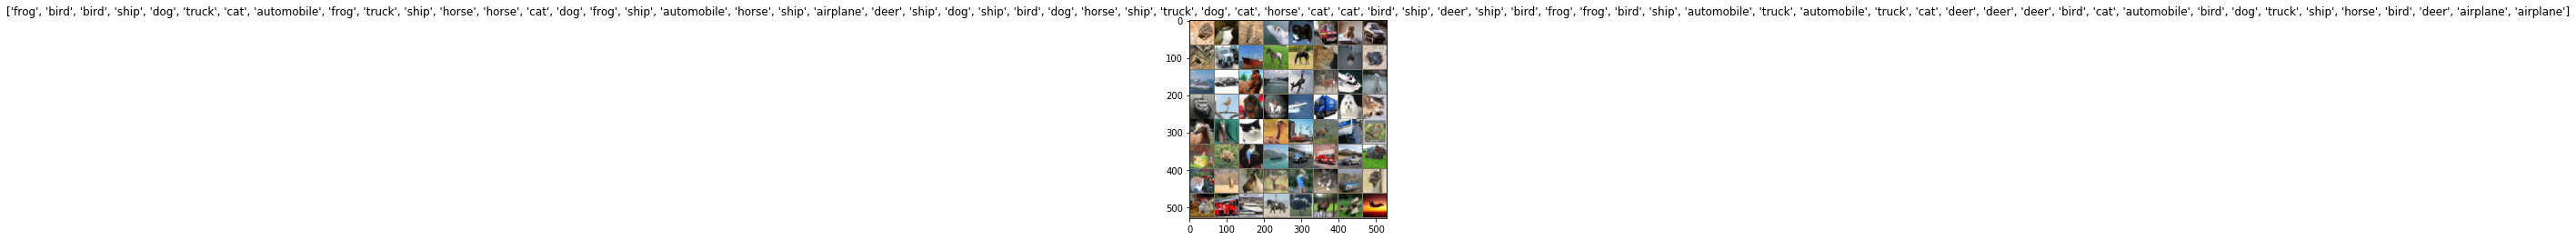

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(imagenet_stats[0])
    std = np.array(imagenet_stats[1])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    #best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            previous_running_loss = 0.0
            previous_running_corrects = 0.0

            # Iterate over data.
            for iteration, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
                if iteration > 0 and iteration % 100 == 0 and phase == 'train':
                    batch_running_corrects = torch.sum(preds == labels.data)
                    inepoch_loss = (running_loss-previous_running_loss) / (100*len(inputs))
                    inepoch_acc = (running_corrects.double()-previous_running_corrects) / (100*len(inputs))
                    previous_running_loss = running_loss
                    previous_running_corrects = running_corrects.double()
                    print('{} - {} Loss: {:.4f} Acc: {:.4f}'.format(iteration, phase, inepoch_loss, inepoch_acc))
                    

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('EPOCH FINISHED: {} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                #best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    # model.load_state_dict(best_model_wts)
    # return model

In [7]:
class CustomFc(torch.nn.Module):
    def __init__(self, D_out, H, dropout):
        super(CustomFc, self).__init__()
        self.avg_pooling = nn.AdaptiveAvgPool2d(1)
        self.max_pooling = nn.AdaptiveMaxPool2d(1)
        self.flatten = nn.Flatten()
        self.linear1 = torch.nn.Linear(4096, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        self.dropout1 =  nn.Dropout(dropout)
        self.dropout2 =  nn.Dropout(dropout)
        self.batch_norm1 = nn.BatchNorm1d(4096)
        self.batch_norm2 = nn.BatchNorm1d(H, momentum=0.01)

    def forward(self, x):
        avg = self.avg_pooling(x)
        mx = self.max_pooling(x)
        x = torch.cat((mx, avg), dim=1)
        x = self.flatten(x)
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = F.relu(self.linear1(x))
        x = self.dropout2(x)
        x = self.batch_norm2(x)
        x = self.linear2(x)

        return x

In [15]:
model_ft = models.resnet50(pretrained=True)

# | remove avg pooling layer at end
layers = list(model_ft.children())[:-2]
model_ft = nn.Sequential(*layers)

# | freeze
for param in model_ft.parameters():
    param.requires_grad = False
    
# | unfreeze the batchnorm layers (this is absolutely crucial!)
for name, param in model_ft.named_parameters(): 
    if 'bn1' in name or 'bn2' in name or 'bn3' in name:
        param.requires_grad = True

# | add output layers
fc = CustomFc(nr_classes, 512, 0).to(device)

model_ft = nn.Sequential(
    model_ft,
    fc
).to(device)

model_ft = model_ft.to(device)


criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0008)
# optimizer_ft = optim.AdamW(model_ft.parameters(), lr=0.0008, betas=(0.9,0.99))

In [ ]:
summary(model_ft, input_size=(3, IMG_DIM, IMG_DIM))

In [ ]:
train_model(model_ft, dataloaders, criterion, optimizer_ft, 5)

Epoch 0/4
----------
100 - train Loss: 1.0455 Acc: 0.6514
200 - train Loss: 0.6429 Acc: 0.7755
300 - train Loss: 0.5450 Acc: 0.8100
400 - train Loss: 0.4950 Acc: 0.8283
500 - train Loss: 0.4576 Acc: 0.8463
600 - train Loss: 0.4120 Acc: 0.8578
700 - train Loss: 0.4057 Acc: 0.8595
EPOCH FINISHED: train Loss: 0.5551 Acc: 0.8089
EPOCH FINISHED: test Loss: 0.3342 Acc: 0.8815

Epoch 1/4
----------
100 - train Loss: 0.3367 Acc: 0.8952
200 - train Loss: 0.3071 Acc: 0.8920
300 - train Loss: 0.3302 Acc: 0.8895
400 - train Loss: 0.3172 Acc: 0.8903
500 - train Loss: 0.3104 Acc: 0.8903
600 - train Loss: 0.3147 Acc: 0.8884
700 - train Loss: 0.3079 Acc: 0.8905
EPOCH FINISHED: train Loss: 0.3163 Acc: 0.8905
EPOCH FINISHED: test Loss: 0.2996 Acc: 0.8971

Epoch 2/4
----------
100 - train Loss: 0.2325 Acc: 0.9322
200 - train Loss: 0.2315 Acc: 0.9214
300 - train Loss: 0.2491 Acc: 0.9113
400 - train Loss: 0.2494 Acc: 0.9148
500 - train Loss: 0.2660 Acc: 0.9122
600 - train Loss: 0.2654 Acc: 0.9088
700 - tra

### Compare with fast.ai model

In [ ]:
import fastai
import fastai.vision

databunch = fastai.vision.DataBunch(dataloaders['train'], dataloaders['test'])

model_ft = fastai.vision.create_cnn_model(fastai.vision.models.resnet50, nr_classes, pretrained=True).to(device)

# | freezing the cnn layers
nr_layers = len(list(model_ft.parameters()))
for param in model_ft.parameters():
    param.requires_grad = False
    
for param in model_ft[-1].parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0008)
# optimizer_ft = optim.AdamW(model_ft.parameters(), lr=0.0008, betas=(0.9,0.99))


train_model(model_ft, dataloaders, criterion, optimizer_ft, 5)